# Introduction to Computer Programming and Numerical Methods

> **Mohamad M. Hallal, PhD** <br> Teaching Professor, UC Berkeley

[![License](https://img.shields.io/badge/license-CC%20BY--NC--ND%204.0-blue)](https://creativecommons.org/licenses/by-nc-nd/4.0/)
***

# Plotting

1. [**Introduction to Matplotlib**](#s1)
2. [**Creating 2-D Plots**](#s2)
3. [**Creating 3-D Plots**](#s3)
4. [**Creating Multiple Subplots**](#s4)
5. [**Additional Reading**](#s5)

***

# 0. Motivation

Data visualization plays a pivotal role in engineering and science, serving as a powerful tool for understanding complex data and effectively conveying results in reports, publications, presentations, and other media. Python has emerged as a popular language for data analysis and visualization, due to its versatility and an array of dedicated libraries. In this section, we will explore the fundamentals of data visualization, with a primary focus on Matplotlib – the cornerstone of Python's data visualization stack. There are other popular libraries, some of which build on Matplotlib, such as Seaborn, GGplot, among others. Matplotlib is extensive, and our goal is not to cover every feature. We will cover the fundamentals of Matplotlib, which should enable you to explore other features.

**Learning objectives:**

* Create a variety of data visualizations, including line plots, bar charts, scatter plots, histograms, and more
* Employ Matplotlib to generate and customize static data visualizations in Python
* Explore advanced data visualization techniques, such as 3-D plots, heatmaps, and geographical mapping
* Utilize subplots to display multiple plots in a single figure
* Apply best practices in data visualization, including labeling and color choices

# 1. Introduction to Matplotlib <a id="s1"></a>

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is highly customizable and supports a wide range of plot types. The [Matplotlib gallery](https://matplotlib.org/gallery/index.html#gallery) contains numerous example plots. Most of the Matplotlib utilities are under the *pyplot* submodule. To use *pyplot*, we need to import it first. The convention is to import Matplotlib's `pyplot` module as `plt`: `import matplotlib.pyplot as plt`.

The general steps for creating plots using Matplotlib are:
1. Create a Figure object
> A Figure is a container that holds all the objects representing axes, graphics, text, and labels
2. Create an Axes object
> An Axes is the plotting area within the figure
3. Plot the data
> Various plotting functions exist for different chart types
4. Configure the plot
> Adjust labels, limits, and other aesthetics to improve clarity and presentation

<br>

Matplotlib offers two primary approaches to creating visualizations:
1. Explicit Axes Interface (Object-Oriented)
    > This approach uses methods on a Figure or Axes object to build a visualization step by step. This gives you more control for customizing your plots, which is especially useful for complex plots.
2. Implicit Pyplot Interface
    > This approach keeps track of the most recent figure and Axes created, and plots to the object Python thinks the user wants. In this case, we rely on `pyplot` to implicitly create the Figure and Axes. This is convenient for simple, quick plots.

We'll discuss the explicit `Axes` interface first, and then see how we can achieve similar plots using the implicit `pyplot` interface.

## 1.1. Creating a Figure Object 

To start crafting your visualization, you will need a Figure object. We can create a new Figure object using `plt.figure()`. Each call to `plt.figure()` generates a **new** Figure object. The `plt.figure()` function has many optional parameters. A full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html). Some of the optional parameters include:

```python
fig = plt.figure(figsize=(6.4, 4.8), dpi=100, ...)
```

where:
* `figsize`: specify figure width and height in inches, e.g.: `figsize = (6,4)` (optional, default: `figsize = (6.4,4.8)`)
* `dpi`: specify the resolution of the figure in dots per inch, e.g.: `dpi = 300` (optional, default: `dpi = 100`)

This creates a new figure, which acts as a single container for all the objects representing axes, graphics, text, and labels. We have used the variable name `fig` to refer to the Figure instance, but any other variable name can be used. The image below shows several Matplotlib elements composing a Figure object.

<br>

<center><figure>
  <img src="https://www.oreilly.com/api/v2/epubs/9781788295260/files/assets/d52747c3-7269-4a18-ad8b-9bdffaae49a6.png" style="width:50%">
    <figcaption style="text-align:center"><strong> <br> Anatomy of a figure:</strong> <a href="https://www.oreilly.com/library/view/matplotlib-2x-by/9781788295260/4a5f710e-dd3a-4ee2-b9e7-4297e392d7b5.xhtml">https://www.oreilly.com/</a></figcaption>  
</figure></center>

## 1.2. Creating a Single Axes Object

Once we have created a new Figure, we can create an *Axes* object to plot various plot types. We can have one or multiple Axes (i.e., subplots) in the same figure. Each Axes contains two (or three in the case of 3-D) Axis objects, which form a bounding box with ticks and labels that will eventually contain the plot elements. 

A new Axes can be created using `plt.axes()`, which can take optional parameters as shown in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html). To create a single 2-D Axes, we can use:

```python
ax = plt.axes()
```

This adds an Axes to the current figure and makes it the current Axes. The variable name `ax` refers to the Axes instance, but any variable name can be used. We'll commonly use the variable name `ax` to refer to an Axes or group of Axes instances. Each call to `plt.axes()` generates a **new** Axes object, which is placed on top of the existing ones by default.

At this point, an empty box is created, as no data has been added to the plot yet.

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Make an empty Axes inside a figure with width 5 inches and height 2.5 inches.</div> 

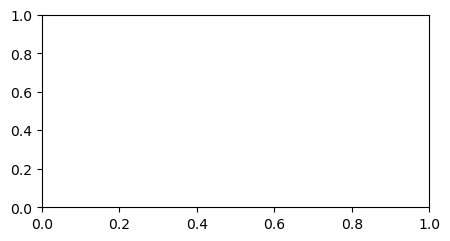

In [5]:
# import matplotlib.pyplot
import matplotlib.pyplot as plt

# create figure
plt.figure(figsize=(5, 2.5))

# create axes
ax = plt.axes()

## 1.3. Creating a Simple Plot

In this section, we will focus on creating a simple plot with a single Axes. Later, we will explore how to work with multiple Axes in the same figure.

Once we have created an Axes, we can use the `ax.plot()` method to plot some data on the Axes. There are many other plotting functions besides `plot()`, but we will use this function initially to illustrate the different parts of an Axes.

<div class="alert alert-block alert-warning"> <b>NOTE!</b> If you used a different variable name for the Axes instance, for example, <code>axes = plt.axes()</code>, you will have to use <code>axes.plt()</code> for plotting.</div>

By default, `plot()` connects data points with lines. The function has many optional parameters, and a full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). The basic syntax is:

```python
plot(x, y, ...)
```

where:
* `x`: array-like or scalar horizontal coordinates of the data points – optional, default: `x = range(len(y))`
* `y`: array-like or scalar vertical coordinates of the data points – required

After plotting the data, you can use `plt.show()` to display the figure. In Jupyter Notebooks, `show()` is called automatically, but it is considered good practice to include it, as it suppresses text output that may be displayed by default.

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Make a plot of the function $y = cos(x)$ for $0\leq x \leq2\pi$ with 100 equally spaced points. The figure should have a width of 5 inches and height 2.5 inches.</div> 

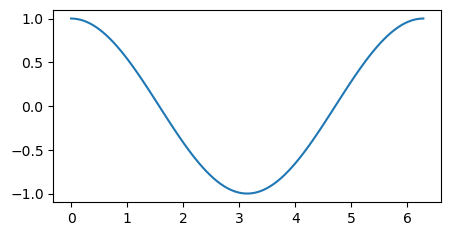

In [7]:
import numpy as np

# create figure and axes
fig = plt.figure(figsize=(5, 2.5))
ax = plt.axes()

# define x and y
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)

# plot x and y
ax.plot(x, y)

# display the figure 
plt.show()

## 1.4. Configuring the Axes

The `plot()` function did the main job of plotting the data. However, the default figure output, as shown above, is *not acceptable* for presenting engineering and scientific data. To enhance the quality of your plots, it's essential to configure various aspects of the Axes, including labels, titles, figure size, axes limits, and grid lines. There are different methods to configure Axes, and all achieve the same result but with slightly different syntax. 

We will look at three different configuration methods:
1. `ax.set_property()`: explicit Axes interface for setting one property at a time
2. `ax.set()`: explicit Axes interface for setting multiple properties at once
3. `plt.property()`: implicit `pyplot` interface for setting one property at a time

### 1.4.1. Configuration Method 1: `ax.set_property()` 

The general syntax for *most* of this configuration's methods is `ax.set_property()`, where `property` should be replaced by the name of a supported property. A comprehensive list of supported properties to control figure configuration can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html).

```python
# add figure title
ax.set_title('Figure title')

# add axes labels
ax.set_xlabel('x label')
ax.set_ylabel('y label')

# control axes limits by specifying (min, max)
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)

# control tick marks by specifying a list of tick locations. Passing an empty list removes all ticks.
ax.set_xticks(ticks)
ax.set_yticks(ticks)

# add grid line. Notice that we did not use ax.set_grid()
ax.grid()
```

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Re-plot the function $cos(x)$ for $0\leq x \leq2\pi$. Control the appearance of the figure by adding title, axes labels, x-axis limits from $0$ to $2\pi$, y-axis limits from $-1.1$ to $1.1$, and grid lines with dotted line style using <code>ax.grid(linestyle=':')</code>.</div> 

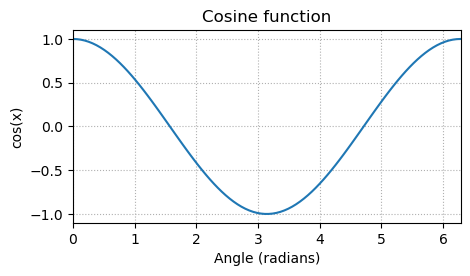

In [9]:
# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# define x and y
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x) 

# plot x and y
ax.plot(x, y)

# add figure title 'Cosine function'
ax.set_title('Cosine function')

# add axes labels 'Angle (radians)' and 'cos(x)'
ax.set_xlabel('Angle (radians)')
ax.set_ylabel('cos(x)')

# control axes limits by specifying (min, max)
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

# add grid line
ax.grid(ls=':')

# display the figure 
plt.show()

### 1.4.2. Configuration Method 2: `ax.set()` 

We can alternatively control *multiple* properties at once by passing them as arguments to `ax.set()`, as shown below:
```python
ax.set(title='Figure title',
       xlabel='x label', ylabel='y label',
       xlim=(min_x, max_x), ylim(min_y, max_y),
       xticks=ticks, yticks=ticks)
```

Note that grid lines cannot be controlled inside `ax.set()`.

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Repeat the above by controlling multiple properties at once using <code>ax.set()</code>.</div> 

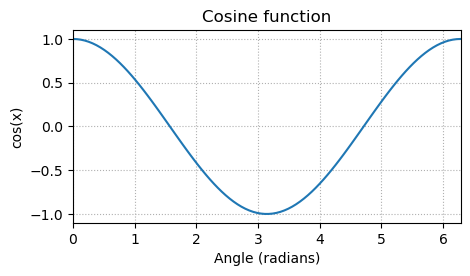

In [11]:
# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# define x and y
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x) 

# plot x and y
ax.plot(x, y)

# set multiple properties
# title: 'Cosine function'
# axes labels: 'Angle (radians)' and 'cos(x)'
# axes limits: x (0, 2 pi) and y (-1.1, 1.1)
ax.set(title='Cosine function', 
      xlabel='Angle (radians)',
      ylabel='cos(x)',
      xlim=(0, 2 * np.pi),
      ylim=(-1.1, 1.1))

# add grid line
ax.grid(linestyle=':')

# display the figure 
plt.show()

### 1.4.3. Configuration Method 3: `plt.property()`

As mentioned earlier, Matplotlib offers two primary ways to create visualizations.
1. Explicit Axes Interface (Object-Oriented)
    > This is what we used so far by explicitly creating `fig` and `ax` and then using methods like `ax.plot()`.
2. Implicit Pyplot Interface
    > This approach keeps track of the most recent figure and Axes created, and plots to the object it thinks the user wants. In this case, we rely on `pyplot` to implicitly create the Figure and Axes and we use `pyplot` functions like `plt.plot()`.

When using the implicit approach, there is no need to explicitly define a Figure using `plt.figure()` or an Axes using `plt.axes()`. In fact, in this case, we can directly use `plt.plot(x, y)`. When you call `plt.plot()`, Matplotlib automatically creates a Figure and an Axes object if none exist. 

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Repeat the above without creating a Figure and an Axes instance. Do not control the properties yet; only plot the data.</div> 

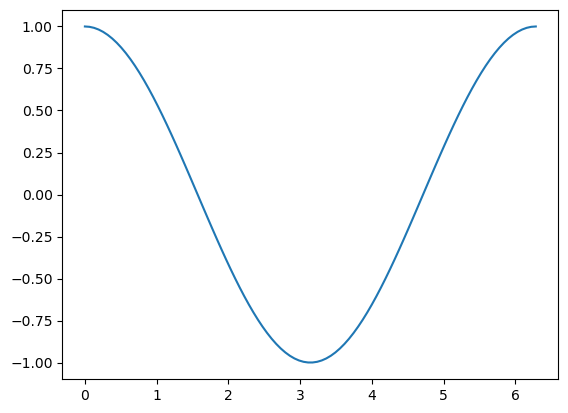

In [13]:
# no need for plt.figure() or plt.axes() with the implicit approach

# define x and y
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x) 

# plot x and y
plt.plot(x, y)

# display the figure 
plt.show()

Then, we can control the Axes properties using `plt.property()`, where `property` should be replaced by the name of a supported property, such as `title`. A comprehensive list of `matplotlib.pyplot` functions to control figure configuration can be found in the [documentation](https://matplotlib.org/stable/api/pyplot_summary.html#axis-configuration).

```python
# add figure title
plt.title('Figure title')

# add axes labels
plt.xlabel('x label')
plt.ylabel('y label')

# control axes limits by specifying (min, max)
plt.xlim(min_x,max_x)
plt.ylim(min_y, max_y)

# control tick marks by specifying a list of tick locations. Passing an empty list removes all ticks.
plt.xticks(ticks)
plt.yticks(ticks)

# add grid line
plt.grid()
```

Note that this is very similar to `ax.set_property()`:
* `plt.title()` $\ \rightarrow$ `ax.set_title()`
* `plt.xlabel()` $\rightarrow$ `ax.set_xlabel()`
* `plt.ylabel()` $\rightarrow$ `ax.set_ylabel()`
* `plt.xlim()` $\ \ \rightarrow$ `ax.set_xlim()`
* `plt.ylim()` $\ \ \rightarrow$ `ax.set_ylim()`

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Repeat the above without creating a Figure and an Axes instance and by controlling figure configuration using <code>plt.property()</code>.</div> 

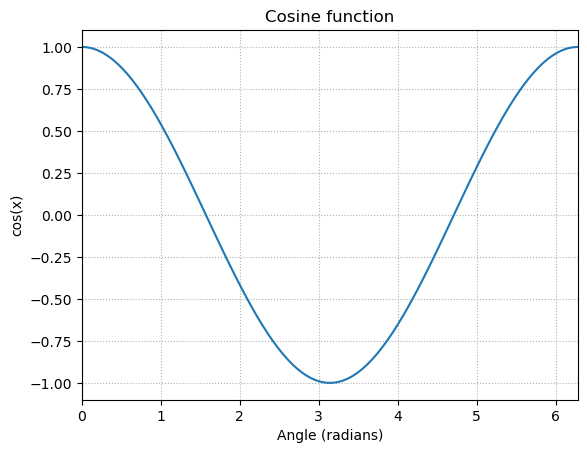

In [15]:
# no need for plt.figure() or plt.axes() with the implicit approach

# define x and y
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x) 

# plot x and y
plt.plot(x, y)

# add figure title 'Cosine function'
plt.title('Cosine function')

# add axes labels 'Angle (radians)' and 'cos(x)'
plt.xlabel('Angle (radians)')
plt.ylabel('cos(x)')

# control axes limits by specifying (min, max): x (0, 2 pi) and y (-1.1, 1.1)
plt.xlim(0, 2 * np.pi)
plt.ylim(-1.1, 1.1)

# add grid line
plt.grid(ls=':')

# display the figure 
plt.show()

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vTzdFHsuiKnnaHwE1tX-0CKApoBmv9vRdmHQs67Vs43oTzwfapt9hCYtZPA5sW1qH-YkVR4kXhNL4ck/pub?w=1782&h=917" style="width:100%">
    <figcaption style="text-align:center"><strong> <br> Plot configuration using an explicit and implicit interface</strong></figcaption>   
</figure></center>
<br> 

So which is better, the explicit interface `ax.plot()` or the implicit interface `plt.plot()`? 

To some extent, all operations can be done using both an explicit and implicit interface, but the explicit has some advantages. The explicit interface provides more control and flexibility, especially for complex plots with multiple Axes. It's also better for reusable functions and scripts. In general, the `pyplot` implicit interface is convenient for quick and simple plots with a single Axes. It saves you from writing more lines of code and is easier for simple visualizations.

Using the explicit interface allows you to keep references to the objects, making it easy to backtrack and operate on an old Axes. This is not easily achieved with the implicit interface.

Which approach to use is solely an individual's choice. However, it is good to stick to one approach to maintain consistency. That's why, it might be better to stick with the explicit interface, as it works with simple and more complex plots.

<div class="alert alert-block alert-success"> <b>TIP!</b> We have seen three methods for controlling axes configuration: <code>ax.set_property()</code>, <code>ax.set()</code>, and <code>plt.property()</code>. This is a potentially confusing feature, due to the differences in syntax. All of them achieve the same result, but differ slightly in the syntax. Choose a method that you are comfortable with and stick with it consistently.</div>

## 1.5. Adding Multiple Datasets

Up until now, we've focused on plotting a single line within a single Axes. However, Matplotlib allows plotting multiple lines within the same Axes. To do this, you can add multiple `ax.plot()` statements before calling `plt.show()`. This method allows you to display multiple datasets in a single plot, making it convenient for visualizing and comparing different data series.

When you have multiple datasets in one plot, it is common practice to use different styling for each line. This can include variations in markers, line styles, colors, or combinations thereof. To distinguish between the datasets, you should also include a legend. A string label can be added to each plot using the `label` parameter:

```python
ax.plot(x, y, label='some string')
```

However, adding a label will not automatically display the legend. To display the legend, you need to add:

```python
ax.legend()
```

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Plot both functions $cos(x)$ and $sin(x)$ for $0\leq x \leq2\pi$ in the same figure. Label each plot and add a legend.</div> 

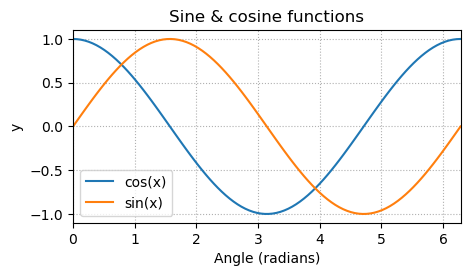

In [17]:
# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# define x
x = np.linspace(0, 2*np.pi, 100)

# plot each line and add labels (plot functions directly)
ax.plot(x, np.cos(x), label='cos(x)')
ax.plot(x, np.sin(x), label='sin(x)')

# set multiple properties (title, xlabel, ylabel, xlim, ylim)
ax.set(title='Sine & cosine functions',
       xlabel='Angle (radians)', ylabel='y',
       xlim=(0, 2*np.pi), ylim=(-1.1, 1.1))

# add grid line
ax.grid(linestyle=':')

# add legend
ax.legend()

# display the figure 
plt.show()

<div class="alert alert-block alert-warning"> <b>NOTE!</b> Matplotlib will automatically cycle through colors, but we will see how to control the line color and style in the next section.</div>

The `ax.legend()` method has many optional parameters. A full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html). Some of these parameters are:

```python
ax.legend(loc='best', ncols=1, fontsize=8, ...)
```

where:
* `loc`: a string or number code specifying the location of the legend (default: `loc = 'best'` or `loc = 0`). See the image below for other options. The location can also be a 2-sized tuple giving the coordinates of the lower-left corner of the legend in Axes coordinates.
* `ncols`: integer specifying the number of columns in the legend (default: `ncols = 1`).
* `fontsize`: integer or a string specifying the font size of the legend, e.g., `fontsize = 8` or `fontsize = 'medium'`.

<br>

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vQN_qaeRapr22A5p4rFxDi1tNppAMAxIfulM7JvDf-98fbwNGdwTnOrtYzhO6SbHdYyv5RixmyKDhH5/pub?w=875&h=588" style="width:60%">
    <figcaption style="text-align:center"><strong> <br> <code>loc</code> arguments for <code>ax.legend()</code></strong></figcaption>  
</figure></center>

<div class="alert alert-block alert-warning"> <b>NOTE!</b> If you add another <code>plt.figure()</code> between the two plot statements, this will create a new Figure, rather than plotting both plots in one Figure. Likewise, if you add another <code>plt.axes()</code> between the two plot statements, this will create a new empty axes in the same Figure.</div>

##  1.6. Saving Figures

Sometimes you want to save a figure for use in a publication, a presentation, or for some other purpose. Matplotlib provides a convenient function `plt.savefig()` for this purpose, allowing you to control the format (PDF, JPEG, PNG, etc.), resolution, and other parameters when saving a figure.

```python
plt.savefig(fname, ...)
```

where:
* `fname`: a string specifying the name to use when saving the figure along with the extension, e.g., `'example.pdf'`

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Rerun the code from above for plotting cosine and sine and add a command to save the figure as a pdf file.</div> 

<div class="alert alert-block alert-warning"> <b>NOTE!</b> Matplotlib's <code>plt.tight_layout()</code> function can help ensure that labels are not cropped when saving figures. You can add it before saving the figure.</div>

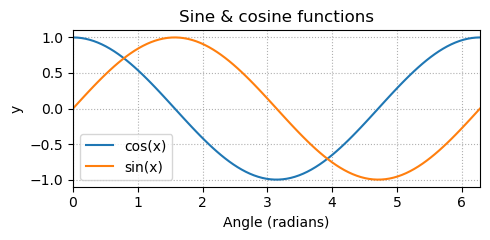

In [19]:
# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# define x
x = np.linspace(0, 2*np.pi, 100)

# plot each line and add labels (plot functions directly)
ax.plot(x, np.cos(x), label='cos(x)')
ax.plot(x, np.sin(x), label='sin(x)')

# set multiple properties (title, xlabel, ylabel, xlim, ylim)
ax.set(title='Sine & cosine functions',
       xlabel='Angle (radians)', ylabel='y',
       xlim=(0, 2*np.pi), ylim=(-1.1, 1.1))

# add grid line
ax.grid(linestyle=':')

# add legend
ax.legend()

# save figure
plt.tight_layout()
plt.savefig('resources/plot.pdf')

# display the figure 
plt.show()

Next, we will discuss in more detail different plotting functions, both for creating 2-D and 3-D plots.

# 2. Creating 2-D Plots <a id="s2"></a>

Matplotlib offers a variety of 2-D plotting functions through the `matplotlib.pyplot` module. Below is a brief list of some commonly used plotting functions along with their descriptions. You can click on the function names to access the official documentation for more details. A more comprehensive list of all available functions can be found in the [official documentation](https://matplotlib.org/stable/api/pyplot_summary.html#adding-data-to-the-plot).

| Function   | Description                                            |
| :--------- | :----------------------------------------------------- |
| [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)                   | Make a plot of $y$ versus $x$ as lines and/or markers  |
| [`loglog()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html#matplotlib.pyplot.loglog)             | Make a plot with log scaling on both the x-axis and y-axis |
| [`semilogx()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html#matplotlib.pyplot.semilogx)       | Make a plot with log scaling on the x-axis             |
| [`semilogy()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogy.html#matplotlib.pyplot.semilogy)       | Make a plot with log scaling on the y-axis             |
| [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)          | Make a scatter plot of $y$ versus $x$                  |
| [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)                       | Make a bar plot                                        |
| [`hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)                    | Make a histogram plot                                  |

<div class="alert alert-block alert-success"> <b>TIP!</b> Programming is a practical skill that needs to be practiced to be learned. This, and any programming course, should not be about teaching you every function and memorizing how it works. Instead, this course is about teaching you a way of thinking and providing you with the fundamentals so you can look up an appropriate function for what you are trying to do, read its documentation, and be able to successfully use it.</div>

## 2.1. Line Plots

Line plots, also known as line graphs, are fundamental visualizations used to illustrate trends and patterns over a continuous range, typically representing time or another variable. Depending on whether you want to use linear or logarithmic scale on each of the axes, you can use any of the following functions:
* [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot): Create a standard line plot.
* [`loglog()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html#matplotlib.pyplot.loglog): Create a plot with logarithmic scaling on both the x-axis and y-axis.
* [`semilogx()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html#matplotlib.pyplot.semilogx): Create a plot with logarithmic scaling on the x-axis.
* [`semilogy()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogy.html#matplotlib.pyplot.semilogy): Create a plot with logarithmic scaling on the y-axis.

These functions share the same general syntax, and for the sake of simplicity, we will primarily focus on `plot()`. The `plot()` function has many optional parameters. A full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). Here is the basic syntax (this was discussed earlier):

```python
plot(x, y, ...)
```

where:
* `x`: array-like or scalar horizontal coordinates of the data points – optional, default: `x = range(len(y))`
* `y`: array-like or scalar vertical coordinates of the data points – required

By default, `plot()` creates a solid line plot that connects the data points. There are different ways to customize the appearance of the plot:

1. Format Strings: A concise way to set basic line properties, consisting of marker, line style, and color. For example, `'o:k'` specifies a circle marker, dotted line style, and black color.
2. Keyword Arguments: Provide more control over plot properties, such as line color, style, marker shape, and size. For example, `marker='o', ls=':', and c='r'` specify a circle marker, dotted line style, and red color, respectively.

### 2.1.1. Format String

Format strings provide a convenient way to set basic line properties in Matplotlib. They consist of three parts: marker, line style, and color, concatenated into one string. The syntax for using format strings is as follows:

```python
plot(x, y, '<marker><line><color>')
```

Each part can consist of one or more characters from a supported list of abbreviations. Below is a selected list of supported marker, line, and color abbreviations. This is not a comprehensive list and there are other styles. A comprehensive list for each style can be found here: [marker](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers), [line](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle), [color](https://matplotlib.org/stable/gallery/color/named_colors.html#base-colors). Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones below.

| Marker | Description          | Line              | Description         | Color  | Description |
| :----- | :------------------- | :---------------  | :------------------ | :----- | :---------  |
| `'o'`  | circle marker        | `'-'`             | solid line style    | `'b'`  | blue        |
| `'.'`  | point marker         | `'--'`            | dashed line style   | `'g'`  | green       |
| `'v'`  | triangle-down marker | `'-.'`            | dash-dot line style | `'r'`  | red         |
| `'^'`  | triangle-up marker   | `':'`             | dotted line style   | `'c'`  | cyan        |
| `'s'`  | square marker        |                   |                     | `'m'`  | magenta     |
| `'*'`  | star marker          |                   |                     | `'y'`  | yellow      |
| `'D'`  | diamond marker       |                   |                     | `'k'`  | black       |
| `'+'`  | plus marker          |                   |                     | `'w'`  | white       |

The figures below show the appearance of the different markers, line styles, and colors.

<br>

<figure>
    <table><tr>
    <td> 
      <p align="center" style="padding: 10px">
        <img src="https://matplotlib.org/stable/_images/sphx_glr_marker_reference_001_2_00x.png" style="width:100%">
        <br>
      </p> 
    </td>
    <td> 
      <p align="center">
        <img src="https://matplotlib.org/stable/_images/sphx_glr_marker_reference_002_2_00x.png" style="width:100%">
        <br>
      </p> 
    </td>
    </tr></table>
    <figcaption style="text-align:center"><strong>Marker styles:</strong> <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html#marker-reference">https://matplotlib.org/</a></figcaption>  
</figure>

<br>

<figure>
    <table><tr>
    <td> 
      <p align="center" style="padding: 10px">
        <img src="https://matplotlib.org/3.0.3/_images/sphx_glr_line_styles_reference_001.png" style="width:100%">
        <br>
      </p> 
    </td>
    <td> 
      <p align="center">
        <img src="https://matplotlib.org/stable/_images/users-prev_whats_new-dflt_style_changes-1.png" style="width:100%"> 
        <br>
      </p> 
    </td>
    </tr></table>
    <figcaption style="text-align:center"><strong>Line and color styles:</strong> <a href="https://matplotlib.org/stable/users/prev_whats_new/dflt_style_changes.html">https://matplotlib.org/</a></figcaption>  
</figure>
<br>

These abbreviations can be combined in any order to create a desired style, such as `'<color><marker><line>'` (e.g., `'ko:'`) instead of `'<marker><line><color>'` (e.g., `'o:k'`). Since each has unique characters, Python will know which is for the marker, which is for the line style, and which is for the color. The default is no marker, solid line style, and a shade of blue which has the characters `'C0'`. Also, you can specify any combination of marker, line style and color (one, two, or all three). 

So, for example, using `':k'` will make a plot with a dotted line style and black color. Since the marker is not specified, the default, no marker, is used.

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Plot the function $f(x) = x^2$ for $-5\leq x \leq5$. Use 20 data points, a circle marker style, a dotted line style, and red color.</div> 

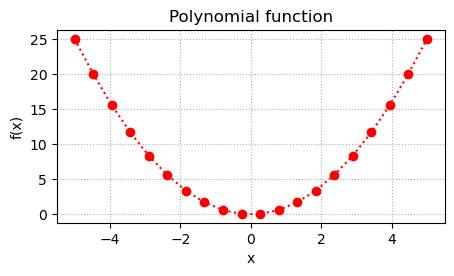

In [21]:
# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# define x
x = np.linspace(-5, 5, 20)

# plot x^2 and use format strings to control configuration
ax.plot(x, x**2, 'o:r')

# control multiple properties
ax.set(title='Polynomial function',
       xlabel='x', ylabel='f(x)')

# add grid line
ax.grid(linestyle=':')

# display the figure 
plt.show()

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Plot the function $f(x) = x^2$ for $-5\leq x \leq5$. Use 20 data points, a circle marker style, a dotted line style, and red color. Also, plot the function $g(x) = x^3$ for $-5\leq x \leq5$. Use 20 data points, no marker, a dashed line style, and blue color. Label each plot and add a legend.</div> 

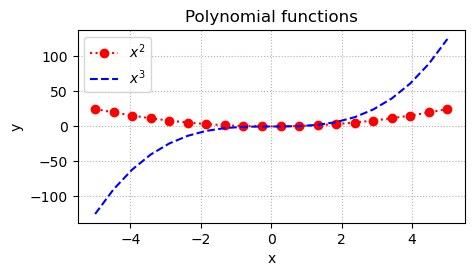

In [23]:
# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# define x
x = np.linspace(-5, 5, 20)

# plot x^2 and x^3 and use format strings to control configuration
ax.plot(x, x**2, 'o:r', label='$x^2$')
ax.plot(x, x**3, '--b', label='$x^3$')

# control multiple properties
ax.set(title='Polynomial functions',
       xlabel='x', ylabel='y')

# add grid line
ax.grid(linestyle=':')

# add legend
ax.legend()

# display the figure 
plt.show()

### 2.1.2. Keyword Arguments

While format strings are a convenient way to control the appearance of a plot, you can also use keyword arguments to gain more control over plot properties. Keyword arguments allow you to specify various properties of the plot, such as line color, line style, marker shape, marker color, and more. This provides greater flexibility when customizing your plots. For example, you can set the line color, line style, marker shape, and marker color with:

```python
plot(x, y, color=None, linestyle=None, marker=None, markerfacecolor=None, ...)
```
The table below includes a list of some of the common keyword arguments for 2-D line plots. A comprehensive list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D).

| Property                   | Description                                         | Example          |
| :------------------------- | :-------------------------------------------------- | :--------------- |
| `alpha`                    | float (0.0 transparent through 1.0 opaque)          | `alpha = .5`     | 
| `color` or `c`             | any *matplotlib* color                              | `c = 'b'`        |
| `linestyle` or `ls`        | string of line style character(s)                   | `ls = ':'`       |
| `linewidth` or `lw`        | float to set line width in points                   | `lw = 2`         |
| `marker`                   | string of marker style                              | `marker = 'o'`   |
| `markeredgecolor` or `mec` | any *matplotlib* color to set color for marker edge | `mec = 'r'`      | 
| `markerfacecolor` or `mfc` | any *matplotlib* color to set color for marker fill | `mfc = 'r'`      | 
| `markersize` or `ms`       | float to set marker size in points                  | `ms = 5`         | 

For instance, you can achieve the same result using either format strings or keyword arguments:

```python
ax.plot(x, x**2, 'o:r')                        # using format strings
ax.plot(x, x**2, marker='o', ls=':', c='r')    # using keyword arguments
```

In cases where format strings and keyword arguments conflict for the same plot (e.g., `ax.plot(x, x**2, 'r', c='k')`), the keyword arguments take precedence. Python will issue a warning about the redundant definition of properties in such scenarios. 

The benefit of keyword arguments lies in their ability to specify more line properties than format strings, offering greater flexibility and control over your plots.

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Plot the function $f(x) = x^2$ for $-5\leq x \leq5$. Use 20 data points, a square marker style, a dotted line style, red color, and marker size of 4 points. Also, plot the function $g(x) = x^3$ for $-5\leq x \leq5$. Use 20 data points, no marker, a dashed line style, blue color, and line width of 3 points. Label each plot and add a legend.</div> 

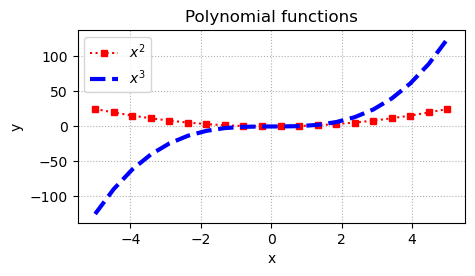

In [25]:
# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# define x
x = np.linspace(-5, 5, 20)

# plot x^2 and x^3 and use keyword arguments to control configuration
ax.plot(x, x**2, label='$x^2$', marker='s', ls=':', c='r', ms=4)
ax.plot(x, x**3, label='$x^3$', ls='--', c='b', lw=3)

# control multiple properties
ax.set(title='Polynomial functions',
       xlabel='x', ylabel='y')

# add grid line
ax.grid(linestyle=':')

# add legend
ax.legend()

# display the figure 
plt.show()

All of the above also apply to other functions, such as `loglog()`, `semilogx()`, and `semilogy()`. 

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Plot the function $h(x) = 10^x$ for $-4\leq x \leq4$. Use a semi log plot with log on the y-axis. Use your preferred formatting style. Control the y-axis tick marks using <code>yticks=(np.logspace(-4,4,5))</code>.</div> 

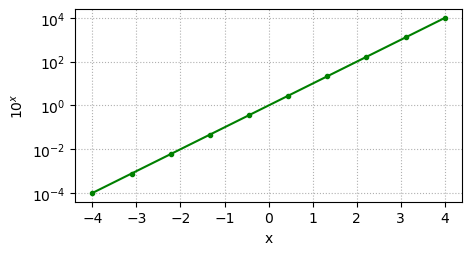

In [27]:
# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# define x
x = np.linspace(-4, 4, 10)

# plot 10^x using semi log plot on the y-axis
ax.semilogy(x, 10**x, '.g-')

# control multiple properties (xlabel, ylabel, yticks)
ax.set(xlabel='x', ylabel='$10^x$', yticks=(np.logspace(-4,4,5)))

# add grid line
ax.grid(linestyle=':')

# display the figure 
plt.show()

## 2.2. Scatter Plots

Scatter plots are an essential tool for visualizing individual data points without connecting them with lines. They are particularly effective for displaying discrete data points. In Matplotlib, you can create scatter plots using two different approaches:

1. Using `plot()` and specifying format string with marker and nothing for line style, e.g., `ax.plot(x, y, 'or')`, or using keyword arguments like `ax.plot(x, y, marker='o', ls='')` (or `ls='none'`)
2. Using `scatter()`, which is explicitly designed for creating scatter plots

### 2.2.1. Scatter Plots with `plot()`

In the previous section we used `plot()` to make line plots. This same function can produce scatter plots by controlling the line style such that only the markers are displayed.

Let's look at an example and visualize it. The dataset `Emissions_Temp.csv` includes annual carbon emissions (million metric tons of carbon) and surface ocean temperature anomaly (degrees F) from 1900 to 2000. The annual temperature anomaly is the departure from the 1971 to 2000 average (degrees F).

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Read the file <code>'resources/Emissions_Temp.csv'</code>. Then, make a scatter plot of the temperature anomaly (third column) versus total emissions (second column). Use a square marker style with size 3 points and magenta color.</div> 

[[ 1.900e+03  5.340e+02 -4.380e-01]
 [ 1.901e+03  5.520e+02 -6.360e-01]
 [ 1.902e+03  5.660e+02 -7.620e-01]
 [ 1.903e+03  6.170e+02 -1.014e+00]
 [ 1.904e+03  6.240e+02 -1.158e+00]
 [ 1.905e+03  6.630e+02 -7.980e-01]
 [ 1.906e+03  7.070e+02 -7.620e-01]
 [ 1.907e+03  7.840e+02 -8.700e-01]
 [ 1.908e+03  7.500e+02 -1.104e+00]
 [ 1.909e+03  7.850e+02 -1.176e+00]]


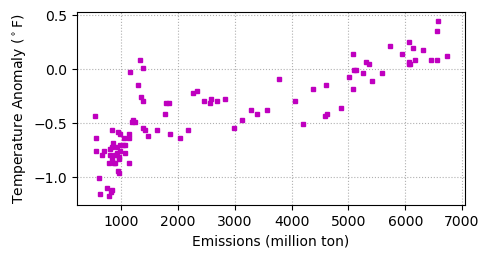

In [43]:
# read data
data = np.loadtxt('resources/Emissions_Temp.csv', delimiter=',', skiprows=1)

# display first 10 rows
print(data[:10, :])

# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# plot the data and configure using format strings
ax.plot(data[:, 1], data[:, 2], 'ms', ms=3)

# plot same data and configure using keyword arguments
# ax.plot(data[:,1], data[:,2], marker='s', c='m', ls='', ms=3)

# control multiple properties
ax.set(xlabel='Emissions (million ton)', ylabel=r'Temperature Anomaly ($^\circ$F)')

# add grid line
ax.grid(linestyle=':')

# display the figure 
plt.show()

### 2.2.2. Scatter Plots with `scatter()`

Another method for creating scatter plots in Matplotlib is by using the `scatter()` function. This approach offers more flexibility and control over scatter plots compared to the `plot()` function. The `scatter()` function allows you to customize various aspects of the plot, including marker size, colors, marker style, and edge colors. A full list of the optional parameters can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). Here is the basic syntax, along with some common optional parameters:

```python
scatter(x, y, s=None, c=None, marker=None, edgecolors=None, ...)
```

where:
* `x`: array-like or scalar horizontal coordinates of the data points (required)
* `y`: array-like or scalar vertical coordinates of the data points (required)
* `s`: float or array-like specifying the marker size (optional)
* `c`: marker colors (optional)
* `marker`: string of marker style, default `marker='o'` (optional)
* `edgecolors`: edge color of the marker, default same color as face/fill (optional)

<div class="alert alert-block alert-warning"> <b>NOTE!</b> You <strong>cannot</strong> use format strings with <code>scatter()</code>. So, this will raise an error: <code>ax.scatter(x, x**2, 'sr')</code>. Instead, you have to use keyword arguments: <code>ax.scatter(x, x**2, marker='s', c='r')</code>.</div>

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Repeat the above plot using <code>scatter()</code>.</div> 

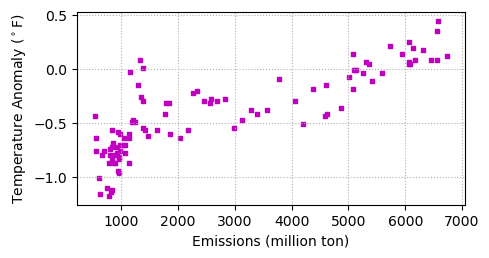

In [45]:
# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# plot the data (square marker style with size 5 and magenta color)
ax.scatter(data[:,1], data[:,2], marker='s', s=5, c='m')

# control multiple properties
ax.set(xlabel='Emissions (million ton)', ylabel=r'Temperature Anomaly ($^\circ$F)')

# add grid line
ax.grid(linestyle=':')

# display the figure 
plt.show()

So, what is the difference between `plot()` and `scatter()`? The primary difference is that `scatter()` can be used to create scatter plots where the properties of each individual point, such as size (`s`), color (`c`), edge color (`edgecolor`), etc. can be individually controlled or mapped to data by passing arrays as arguments. This is not possible with `plot()`.

<div class="alert alert-block alert-info"> <b>TRY IT!</b> The emissions data also includes a column for Year (first column). Plot the same data but set the color of the markers based on the year.</div> 

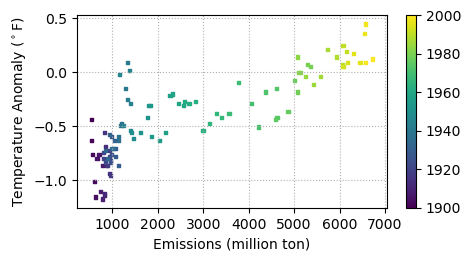

In [49]:
# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# plot the data and control color based on year
ax1 = ax.scatter(data[:,1], data[:,2], marker='s', s=5, c=data[:,0])

# control multiple properties
ax.set(xlabel='Emissions (million ton)', ylabel=r'Temperature Anomaly ($^\circ$F)')

# add grid line
ax.grid(linestyle=':')

# add colorbar
fig.colorbar(ax1)

# display the figure 
plt.show()

Notice that the color argument `c` is automatically mapped to a color scale (shown above by the `fig.colorbar(ax1)` command, where `fig` is the object name we used to refer to the Figure instance and `ax1` is the object name we used to refer to the container instance that includes the plot). This way, the color of the points can be used to convey information in a very powerful way. 

The figure below shows a very effective visualization, where the marker size is mapped to the city area and the color is mapped to the population of different cities in California.

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vSMtARPfEUkZ3fStOaZ7ggC3aPM3phdDIJb5PdnB31y8zFWqPHRPHUT9MUnOOtcJji5gt5zNrh8OYQT/pub?w=1373&h=1028" style="width:60%">
    <figcaption style="text-align:center"><strong>Location, geographic size, and population of California cities:</strong> <a href="https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html">https://www.oreilly.com/</a></figcaption>  
</figure></center>

<br>

## 2.3. Bar Charts

Bar charts are used to visualize categorical data distributions. In Matplotlib, you can use `bar()` to create bar charts. A full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Here is the basic syntax, along with some common optional parameters:

```python
bar(x, height, width, ...)
```

where:
* `x`: float or array-like which includes x-coordinates or categories of the bars (required)
* `height`: float or array-like which includes the height(s) of the bars (required)
* `width`: float or array-like which includes the width(s) of the bars, default: `width=0.8` (optional)

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Make a bar plot of the early-semester survey results, where <code>experience</code> is the level of experience in Python and <code>perc</code> is the percentage of responses in each category: <code>experience = ['None', 'Novice', 'Reasonable', 'Good', 'Very Good']</code> and <code>perc = [37, 29, 21, 10, 3]</code>.</div> 

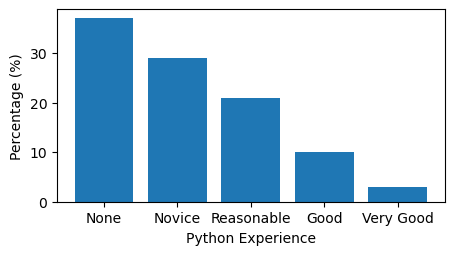

In [51]:
# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# data
experience = ['None', 'Novice', 'Reasonable', 'Good', 'Very Good']
perc = [37, 29, 21, 10, 3]

# plot the data
ax.bar(experience, perc)

# control multiple properties
ax.set(xlabel='Python Experience', ylabel='Percentage (%)')

# display the figure 
plt.show()

## 2.4. Histogram Plots

Histograms are used to visualize the distribution of numerical data. In Matplotlib, you can use `hist()` to plot a histogram. The `hist()` function has many optional parameters. A full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html). Here is the basic syntax, along with some common optional parameters:

```python
hist(x, bins=None, color=None, ...)
```

where:
* `x`: array or sequence of arrays which includes input values (required)
* `bins`: integer number of bins or sequence of bin edges, default: `bins=10` (optional)
* `color`: color or sequence of colors for the bars (optional)

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Plot a histogram of the emissions data (second column) using 15 bins.</div> 

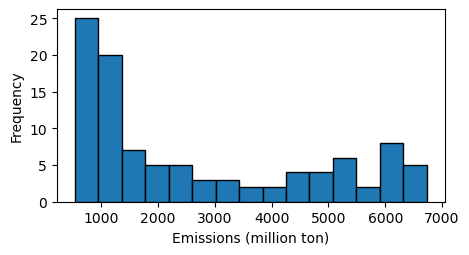

In [55]:
# create figure and axes
fig = plt.figure(figsize=(5,2.5))
ax = plt.axes()

# plot the data
ax.hist(data[:, 1], bins=15, ec='k')

# control multiple properties
ax.set(xlabel='Emissions (million ton)', ylabel='Frequency')

# display the figure 
plt.show()

There are other functions for plotting data in 2-D. The [`errorbar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html#matplotlib.pyplot.errorbar) function plots x versus y data but with error bars for each element; [`boxplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot) gives a statistical summary of a dataset; and [`pie()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie) makes a pie chart. You can check their details in the [documentation](https://matplotlib.org/stable/api/pyplot_summary.html#adding-data-to-the-plot). 

# 3. Creating 3-D Plots <a id="s3"></a>

Matplotlib was initially designed with only 2-D plotting in mind. Some 3-D plotting utilities were built on top of Matplotlib's 2-D display, and the result is a convenient, but somewhat limited, set of tools for 3-D data visualization. The [Matplotlib gallery](https://matplotlib.org/stable/gallery/mplot3d/index.html#d-plottingy) contains example 3-D plots.

You can create 3-D plots in Matplotlib by using the `projection='3d'` parameter when defining your Axes. By setting `projection='3d'`, you create an empty 3-D Axes. If you don't specify this parameter, Matplotlib will default to a 2-D Axes.

```python
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.show()
```

<div class="alert alert-block alert-warning"> <b>NOTE!</b> Prior to Matplotlib 3.2.0, it was necessary to explicitly import the <code>mplot3d</code> toolkit, which adds the 3-D plotting capabilities: <code>from mpl_toolkits import mplot3d</code>. However, it is no longer necessary to explicitly import <code>mplot3d</code> to create 3-D axes.</div> 

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Make an empty 3-D Axes.</div> 

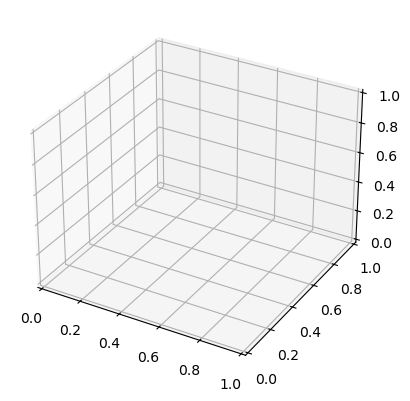

In [57]:
# create figure
fig = plt.figure()

# create axes
ax = plt.axes(projection='3d')

The `ax = plt.axes(projection='3d')` creates a 3-D Axes object, which we can use to plot a variety of 3-D plot types using different functions. 3-D plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook.

To enable interactive figures, you can add `%matplotlib widget` to your code. This enables interactive operations like pan, zoom in/out, rotation, and so on. 

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Enable interactive figures and then make an empty 3-D Axes.</div> 

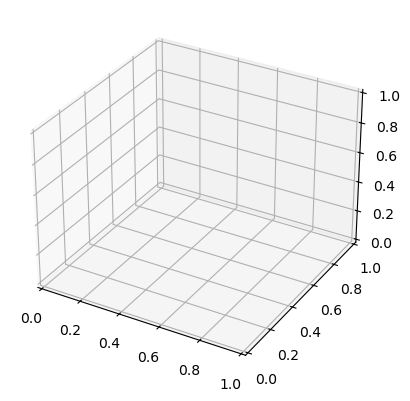

In [65]:
# enable interactive figures
#%matplotlib widget
%matplotlib inline

# create figure
fig = plt.figure()

# create axes
ax = plt.axes(projection='3d')
plt.show()

Note that before plotting the next figure, you need disable interactive features using `%matplotlib inline`. If you do not disable the interactive features, the next figure will be plotted in the same frame.

Using `plt.axes()` adds an Axes to the current Figure and makes it the current Axes. Once we have created an Axes, we can use the `plot()` function to plot data. Similar to 2-D graphs, various functions are available for plotting 3-D graphs, including 3-D line plots, scatter plots, surface plots, wireframe plots, contour plots, etc. The table below shows a brief list of some of these functions. You can click on them to learn more. A more comprehensive list of all the available functions can be found in the [documentation](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html).

| Function   | Description                                            |
| :--------- | :----------------------------------------------------- |
| [`plot()`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot)                     | Make a plot of $x$, $y$, and $z$ as lines and/or markers |
| [`scatter()`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.scatter.html#mpl_toolkits.mplot3d.axes3d.Axes3D.scatter)               | Make a scatter plot of $x$, $y$, and $z$                 |
| [`plot_surface()`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface)     | Make a surface plot                                      |
| [`plot_wireframe()`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_wireframe.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_wireframe) | Make a 3-D wireframe plot                                |
| [`contour()`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.contour.html#mpl_toolkits.mplot3d.axes3d.Axes3D.contour)               | Make a 3-D contour plot                                  |
| [`bar()`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.bar.html#mpl_toolkits.mplot3d.axes3d.Axes3D.bar)                       | Make a bar plot                                          |      

<div class="alert alert-block alert-warning"> <b>NOTE!</b> Matplotlib also includes functions such as <code>plot3D()</code> and <code>scatter3D()</code>. However, based on the <a href="https://github.com/matplotlib/matplotlib/blob/v3.6.2/lib/mpl_toolkits/mplot3d/axes3d.py#L2116-L2188">source code</a>, it looks like these are just aliases for <code>plot()</code> and <code>scatter()</code> and do not provide any different functionality.</div> 

## 3.1. Line Plots in 3-D

The call signature for line plots in 3-D is nearly identical to that of their 2-D counterparts:

```python
plot(x, y, z, ...)
```
You can use format strings `'<marker><line><color>'` and many of the same parameters on 2-D line plots.

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Make a 3-D parametric plot where $x=sin(z)$, $y=cos(z)$, and $-2\pi\leq z\leq2\pi$. Use 100 points, no marker, a dash-dot line style, green color, and line width of 3 points. Add axes labels 'sin(z)', 'cos(z)', and 'z' for x, y, and z, respectively, and a title 'Parametric plot'.</div>

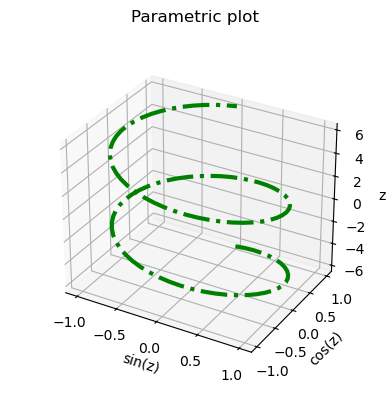

In [67]:
# disable interactive figures
%matplotlib inline

# create figure and axes
fig = plt.figure()
ax = plt.axes(projection='3d')

# define data for a three-dimensional line
z = np.linspace(-2*np.pi, 2*np.pi, 100)
x = np.sin(z)
y = np.cos(z)

# plot the data
ax.plot(x, y, z, '-.g', lw=3)

# control multiple properties
ax.set(title='Parametric plot',
      xlabel='sin(z)', ylabel='cos(z)', zlabel='z')

# control axes aspect ratio
ax.set_box_aspect(aspect=(1.25,1,1), zoom=.85)

# display the figure 
plt.show()

## 3.2. Scatter Plots in 3-D

The call signature for scatter plots in 3-D is also nearly identical to that of their 2-D counterparts:

```python
scatter(x, y, z, ...)
```

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Plot the same data but using a scatter plot.</div>

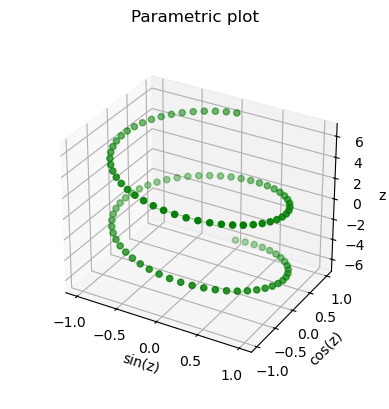

In [69]:
# create figure and axes
fig = plt.figure()
ax = plt.axes(projection='3d')

# plot the data
ax.scatter(x, y, z, c='g')

# control multiple properties
ax.set(title='Parametric plot',
      xlabel='sin(z)', ylabel='cos(z)', zlabel='z')

# control axes aspect ratio
ax.set_box_aspect(aspect=(1.25,1,1), zoom=.85)

# display the figure 
plt.show()

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page.

## 3.3. Surface Plots in 3-D

In some cases, we want to visualize a 3-D surface, such as some function $f(x,y)$, rather than plotting lines or markers. In Python, this can be achieved using `plot_surface()`:

```python
plot_surface(X, Y, Z, ...)
````

where:
* `X`, `Y`, and `Z`: 2-D arrays of the x, y, and z coordinates, respectively

It is important to note that each coordinate should be a 2-D array, which is known as gridded data or a mesh. Given lists/arrays of x and y values, a mesh is a listing of **all the possible combinations of x and y**. One way of creating a mesh in Python is using the `np.meshgrid()` function:

```python
X, Y = np.meshgrid(x, y)
```

where:
* `x` and `y`: 1-D lists each containing the x and y coordinates
* `X` and `Y`: returned 2-D arrays in mesh format

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Create two arrays <code>x</code> and <code>y</code>, each with 12 points between $-4$ and $4$. Then, create a mesh <code>X</code> and <code>Y</code> using <code>np.meshgrid()</code>. Print the values of <code>X</code>.</div>

In [71]:
# define x and y
x = np.linspace(-4, 4, 12)
y = x

# define X and Y using np.meshgrid()
X, Y = np.meshgrid(x, y)

# display X
print(X)

[[-4.         -3.27272727 -2.54545455 -1.81818182 -1.09090909 -0.36363636
   0.36363636  1.09090909  1.81818182  2.54545455  3.27272727  4.        ]
 [-4.         -3.27272727 -2.54545455 -1.81818182 -1.09090909 -0.36363636
   0.36363636  1.09090909  1.81818182  2.54545455  3.27272727  4.        ]
 [-4.         -3.27272727 -2.54545455 -1.81818182 -1.09090909 -0.36363636
   0.36363636  1.09090909  1.81818182  2.54545455  3.27272727  4.        ]
 [-4.         -3.27272727 -2.54545455 -1.81818182 -1.09090909 -0.36363636
   0.36363636  1.09090909  1.81818182  2.54545455  3.27272727  4.        ]
 [-4.         -3.27272727 -2.54545455 -1.81818182 -1.09090909 -0.36363636
   0.36363636  1.09090909  1.81818182  2.54545455  3.27272727  4.        ]
 [-4.         -3.27272727 -2.54545455 -1.81818182 -1.09090909 -0.36363636
   0.36363636  1.09090909  1.81818182  2.54545455  3.27272727  4.        ]
 [-4.         -3.27272727 -2.54545455 -1.81818182 -1.09090909 -0.36363636
   0.36363636  1.09090909  1.818

Then, we can visualize a surface $Z=f(X,Y)$ using `plot_surface(X, Y, Z)`. The `plot_surface()` function has many optional parameters. A full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface). Here is the basic syntax, along with some common optional parameters:

```python
plot_surface(X, Y, Z, cmap=None, ...)
````

where:
* `X`, `Y`, and `Z`: 2-D arrays of the x, y, and z coordinates, respectively
* `cmap`: typically a string specifying the name of the colormap of the surface patches, e.g., `cmap='virdis'`

Using a colormap can enhance the perception of the surface topology. Matplotlib provides many built-in colormaps, and you can even create your own. An example of some colormaps is illustrated in the figure below. A comprehensive list can be found in the [documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

<br>

<center><figure>
  <img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_001.png" style="width:75%">
    <figcaption style="text-align:center"><strong>Example of built-in sequential colormaps:</strong> <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html#sequential">https://matplotlib.org/</a></figcaption>  
</figure></center>

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Create the surface $Z=sin\left(\sqrt{X^2+Y^2}\right)$ and plot it using <code>plot_surface()</code>. Use the 'plasma' colormap.</div>

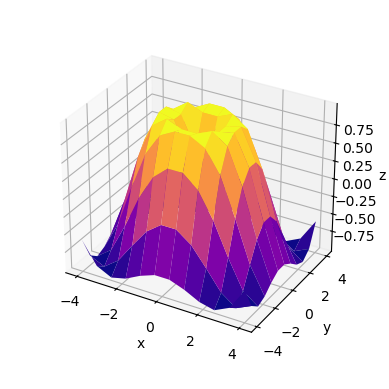

In [73]:
# create figure and axes
fig = plt.figure()
ax = plt.axes(projection='3d')

# define data for a three-dimensional surface
Z = np.sin(np.sqrt(X**2 + Y**2))

# plot the data
ax.plot_surface(X, Y, Z, cmap='plasma')

# control multiple properties
ax.set(xlabel='x', ylabel='y', zlabel='z')

# control axes aspect ratio
ax.set_box_aspect(aspect=(1.25,1,1), zoom=.85)

# display the figure 
plt.show()

You will notice that the surface plot shows different colors for different elevations (z values), since we specified `cmap = 'plasma'`.

## 3.4. Wireframe Plots in 3-D

A wireframe plot is another useful visualization for gridded data, representing the edges of a surface using lines. In Matplotlib, we can use `plot_wireframe()` to plot a wireframe of a surface. The `plot_wireframe()` function has many optional parameters. A full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_wireframe.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_wireframe). Here is the basic syntax, along with some common optional parameters:

```python
plot_wireframe(X, Y, Z, color=None, ...)
````

where:
* `X`, `Y`, and `Z`: 2-D arrays of the x, y, and z coordinates, respectively
* `color`: line colors, e.g., `color='r'`

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Re-plot the surface $Z=sin\left(\sqrt{X^2+Y^2}\right)$ using <code>plot_wireframe()</code>. Use black color.</div>

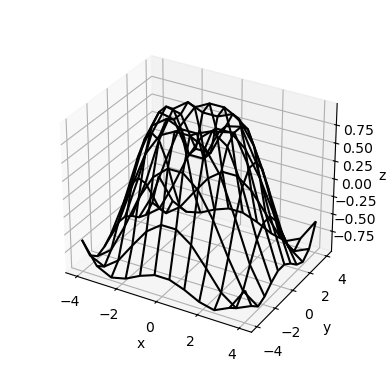

In [75]:
# create figure and axes
fig = plt.figure()
ax = plt.axes(projection='3d')

# plot the data
ax.plot_wireframe(X, Y, Z, color='k')

# control multiple properties
ax.set(xlabel='x', ylabel='y', zlabel='z')

# control axes aspect ratio
ax.set_box_aspect(aspect=(1.25,1,1), zoom=.85)

# display the figure 
plt.show()

There are many more functions related to plotting in Python and this is in no way an exhaustive list. However, it should be enough to get you started so that you can find the plotting functions that suit what you are trying to visualize. 
You can find more examples of different 3-D plots on the [mplot3d tutorial website](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html).

# 4. Creating Multiple Subplots <a id="s4"></a>

In all of the examples above, we had one Axes (one subplot) inside each Figure. However, in many cases, it is helpful to have different views of data side by side, which is the concept of subplots: groups of several Axes that exist together within a single Figure. These subplots might be grids of plots or other more complicated layouts. There are different methods for creating subplots using Matplotlib, some of which serve the same purpose. We will discuss the following methods:
1. Using `plt.subplots()`
2. Using `plt.subplot()` (See [Additional Reading](#s5))
3. Using `plt.axes()` (See [Additional Reading](#s5))

There are other methods, but these cover the most basic and fundamental ones.

## 4.1. Using `plt.subplots()`

Often, we are interested in creating subplots in aligned rows and columns, or in other words, a grid of subplots. One convenient way of doing so is the `plt.subplots()` function, which not only creates the subplots but also organizes them in a grid-like structure, making it easier to work with multiple plots in a single figure. The `plt.subplots()` function returns the full grid of Axes in a NumPy array. Additionally, it automatically generates the Figure object, eliminating the need for explicitly using `fig = plt.figure()`. The `plt.subplots()` function has several optional parameters. A full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). The basic syntax is:

```python
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.4, 4.8), dpi=100, ...)
```

where:
* `nrows`: integer specifying the number of rows in the subplot grid
* `ncols`: integer specifying the number of cols in the subplot grid

You can also specify optional parameters `sharex` and `sharey`, which allow you to specify the relationships between different axes.

The `ax` variable in this case will be a 2-D array with `nrows` rows and `ncols` columns. We can then use array indexing to add data and configure each Axes/subplot. For example `ax[0,0]` calls the axes in the top left corner. Note that indexing starts at 0, aligning with Python's conventional 0-based indexing.

The figure below illustrates an example of how to index `ax`.

<br>

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vQuuAzJtBgDjzOyyEFXAHVgazInJ0Pxs77A1nwZ2lVzpd2znUpiWI2AYF9sALOH7j-LruK2ZUf96vrr/pub?w=913&h=681" style="width:60%">
    <figcaption style="text-align:center"><strong>Example of indexing using <code>plt.subplots()</code> with 2 rows and 3 columns</strong></figcaption>  
</figure></center>

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Plot the function $f(x) = x^2$, where <code>x = np.arange(11)</code>. Plot the same function in a 2 by 2 figure, where one Axes uses <code>plot()</code>, one uses <code>scatter()</code>, one uses <code>loglog()</code>, and one uses <code>semilogy()</code>.</div> 

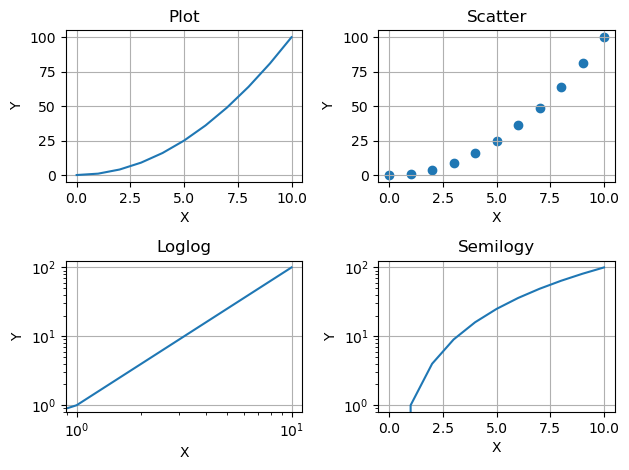

In [77]:
# define x and y
x = np.arange(11)
y = x**2

# create figure and axes
fig, ax = plt.subplots(nrows=2, ncols=2)

# plot first axes (plot)
# set title, xlabel, ylabel, and add grid lines
ax[0, 0].plot(x, y)
ax[0, 0].set(title='Plot', xlabel='X', ylabel='Y')
ax[0, 0].grid()

# plot second axes (scatter)
ax[0, 1].scatter(x, y)
ax[0, 1].set(title='Scatter', xlabel='X', ylabel='Y')
ax[0, 1].grid()

# plot third axes (loglog)
ax[1, 0].loglog(x, y)
ax[1, 0].set(title='Loglog', xlabel='X', ylabel='Y')
ax[1, 0].grid()

# plot fourth axes (semilogy)
ax[1, 1].semilogy(x, y)
ax[1, 1].set(title='Semilogy', xlabel='X', ylabel='Y')
ax[1, 1].grid()

# automatically adjust the size and positions of the subplots to prevent overlaps
plt.tight_layout()

# display the figure 
plt.show()

To create subplot arrangements that span multiple rows and columns beyond a regular grid, Matplotlib offers `GridSpec`, providing a flexible layout mechanism. Below is an example with a 3x3 grid, showcasing Axes that span all three columns, two columns, and two rows. We will not go over the details of `GridSpec`. You can read more about it in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html).

<br>

<center><figure>
  <img src="https://matplotlib.org/stable/_images/sphx_glr_gridspec_multicolumn_001_2_00x.png" style="width:50%">
    <figcaption style="text-align:center"><strong><br>Example subplots with <code>Gridspec</code></strong>: <a href="https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_multicolumn.html#sphx-glr-gallery-subplots-axes-and-figures-gridspec-multicolumn-py">https://matplotlib.org/</a></figcaption>  
</figure></center>

# 5. Additional Reading <a id="s5"></a>

## 5.1. Creating Subplots Using `plt.subplot()`

Another, but less convenient way of creating subplots is the `plt.subplot()` function (note the absence of `s` at the end compared to `plt.subplots()`), which creates a single Axes in a grid of multiple Axes. The `plt.subplot()` function has several optional parameters. A full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html). The basic syntax is:

```python
axi = plt.subplot(nrows, ncols, index, sharex, sharey, ...)
```

where:
* `nrows`: integer specifying the number of rows in the subplot grid
* `ncols`: integer specifying the number of cols in the subplot grid
* `index`: integer specifying the subplot to create or activate. `index` starts at 1 in the upper left corner and increases to the right.
* `sharex`, `sharey`: Axes object to share the x-axis and/or y-axis with, respectively. The axis will have the same limits, ticks, and scale as the axis of the shared Axes, e.g., `sharex=ax1`

For example, `ax1 = plt.subplot(2, 2, 1)` will create an Axes in the the top left corner in a grid that contains 2 by 2 Axes and assign it to the Axes object `ax1`, which we can use to plot data. We can alternatively use `ax1 = plt.subplot(221)` (3-digit integer specifying `nrows`, `ncols`, `index` without separating them by commas). However, this only works if there are no more than 9 subplots.

The figure below illustrates an example of how to use `nrows`, `ncols`, and `index`.

<br>

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vRGXL1VrS44vXX2sXkApSpZA5iq0a5849CEhqHoVJxZm1oRyBvxYExAvMGs16JahRoKMZVL_tkKqFLC/pub?w=913&h=686" style="width:60%">
    <figcaption style="text-align:center"><strong>Example of <code>plt.subplot()</code> with 2 rows and 3 columns of subplots</strong></figcaption>  
</figure></center>


Note that you have to call `plt.subplot()` every time you want to add a new Axes/subplot, as `plt.subplot()` creates a **single** Axes in a grid of Axes, rather than creating all of them at once. This is less convenient than `plt.subplots()`, which creates all subplots at once.

There are other methods that could be used that are similar to `axi = plt.subplot(nrows, ncols, index)`. For example, if we have defined a Figure object using `fig = plt.figure()`, then we can use `axi = fig.add_subplot(nrows, ncols, index)` to add a new Axes/subplot in the same way as `plt.subplot()`. Choose one method and stick with it consistently.

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Plot the function $f(x) = x^2$, where <code>x = np.arange(11)</code>. Plot the same function in a 2 by 2 figure, where one Axes uses <code>plot()</code>, one uses <code>scatter()</code>, one uses <code>loglog()</code>, and one uses <code>semilogy()</code>.</div> 

In [ ]:
# define x and y
x = np.arange(11)
y = x**2

# create figure
fig = plt.figure(figsize = (6, 6))

# create and plot first axes (plot)


ax1.set(title='Plot', xlabel='X', ylabel='Y')
ax1.grid()

# create and plot second axes (scatter)

ax2.scatter(x, y)
ax2.set(title='Scatter', xlabel='X', ylabel='Y')
ax2.grid()

# create and plot third axes (loglog)

ax3.loglog(x, y)
ax3.set(title='Loglog', xlabel='X', ylabel='Y')
ax3.grid()

# create and plot fourth axes (semilogy)

ax4.semilogy(x, y)
ax4.set(title='Semilogy', xlabel='X', ylabel='Y')
ax4.grid()

# automatically adjust the size and positions of the subplots to prevent overlaps
plt.tight_layout()

# display the figure 
plt.show()

## 5.2. Creating Subplots Using `plt.axes()` <a id="s5"></a>

Lastly, rhe most basic method of creating multiple Axes is to add several `plt.axes()` statements. Every time you call `plt.axes()`, it creates a new empty Axes which you can use to plot data. 

By default, `plt.axes()` creates an Axes that fills the entire figure. We can control the dimensions of the Axes to allow displaying multiple Axes in the same Figure. `plt.axes()` takes an optional argument that is a list of four numbers which numbers represent `[left, bottom, width, height]` in the figure coordinate system, ranging from 0 at the bottom left of the figure to 1 at the top right of the figure.

<br>

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vQS8A1yKM4xbc71VBLgN4mOFLFBXQRRnfHJavq4EKBUNQKl9gQUrenn7l1POgKOf7Pn59eQowWjK_Vu/pub?w=950&h=684" style="width:50%">
    <figcaption style="text-align:center"><strong>Controlling Axes position</strong></figcaption>  
</figure></center>


```python
ax1 = plt.axes([left_1, bottom_1, width_1, height_1]) # create the first Axes
... # perform some operations, like ax1.plot(x,y)

ax2 = plt.axes([left_2, bottom_2, width_2, height_2]) # create the second Axes
... # perform some operations, like ax2.plot(x,y)
```

<div class="alert alert-block alert-info"> <b>TRY IT!</b> Create a figure with width 5 inches and height 4 inches. Then, create two Axes, the first with default dimensions and the second with dimensions <code>[0.4, 0.6, 0.25, 0.2]</code>. In both Axes, plot the functions $f(x) = x^2$ and $g(x) = x^3$ for $-5\leq x \leq5$. Label each plot and add a legend to the first Axes. For the second Axes, give it a title 'zoom near origin' and set the x-axis limits between $-2$ and $2$ and the y-axis limits between $-5$ and $5$.</div> 

In [ ]:
# create figure and axes
fig = plt.figure(figsize=(5,4))


# define x
x = np.linspace(-5, 5, 20)

# plot within ax1


# plot within ax2


# control multiple properties for ax1
ax1.set(title='Polynomial functions',
       xlabel='x', ylabel='y')

# control multiple properties for ax2
ax2.set(title='zoom near origin',
       xlim=(-2,2), ylim=(-5,5))

# add legend
ax1.legend()

# display the figure 
plt.show()